<a href="https://colab.research.google.com/github/elzains/Catalens-Capstone-Project/blob/main/Capstone_Project_Catalens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSRdcxSpBXkWmohwyidKrTVmCtkp_YYZjbuHe7WHqhyphenhyphensoGTFZrr7hli6o8ZmL6yZb3Q0a7Nt6Q6TcmzYpp44lKgWfBRTZV43BDB0jCcz79x63vSE81kBG_IInG9ukXz_6JcG9zmNjEXWdcPrMu8kokIhJs_sK_IYZamgve51HR4WQ8903ZuwyCaFdI-l4S/s1584/White%20Clean%20Minimalist%20Corporate%20Personal%20Profile%20LinkedIn%20Banner.png" width="100%">

---
# **⚡ Capstone Project Catalens 2024 ☕**
⏪ **Catalens is an Application for Detecting Cataracts in The Eye Using Machine Learning Technology** ⏩


---






### **0. Preparation**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

### **1. Mounting Datasets**

In [3]:
# Check Connection
from google.colab import drive
drive.mount('/content/drive/')

base_dir = '/content/drive/MyDrive/bigdata'
!ls '/content/drive/MyDrive/bigdata'

Mounted at /content/drive/
test  train


### **2. Split Datasets Train and Test**

In [4]:
import os

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_cataract = os.path.join(train_dir, 'cataract')
train_normal = os.path.join(train_dir, 'normal')

test_cataract = os.path.join(test_dir, 'cataract')
test_normal = os.path.join(test_dir, 'normal')

print('Total Train Datasets')
print('Cataract =',len(os.listdir(train_cataract)))
print('Normal =',len(os.listdir(train_normal)))

print('\n\nTotal Test Datasets')
print('Cataract =',len(os.listdir(test_cataract)))
print('Normal =',len(os.listdir(test_normal)))

Total Train Datasets
Cataract = 4019
Normal = 1293


Total Test Datasets
Cataract = 333
Normal = 126


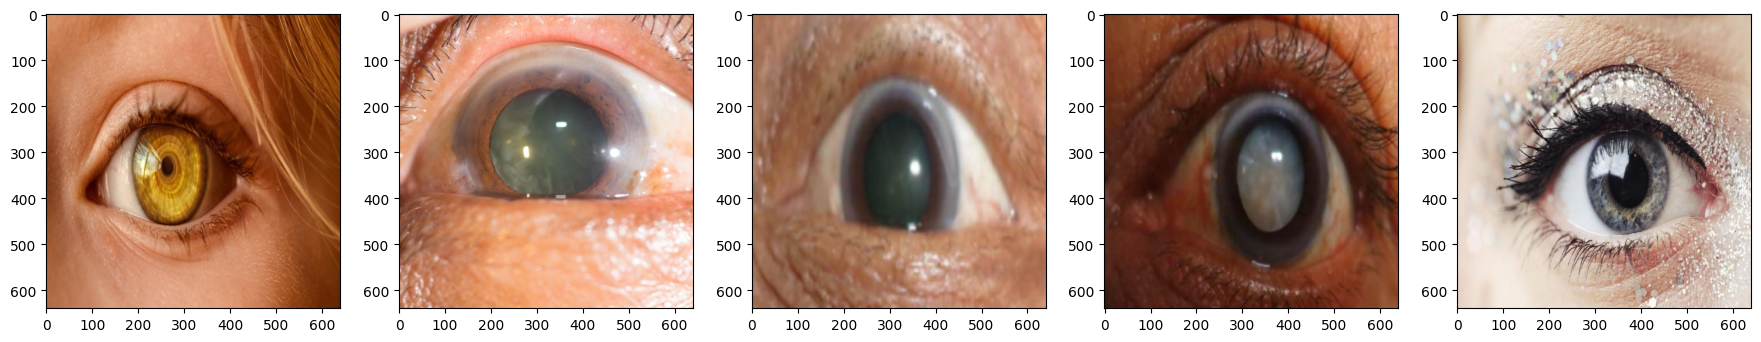

In [6]:
# Preview Cataract
os.chdir(train_cataract)
filenames = os.listdir()
images = []

for i in range(5):
  image = plt.imread(filenames[i])
  images.append(image)

plt.figure(figsize=(22, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i])
plt.show()

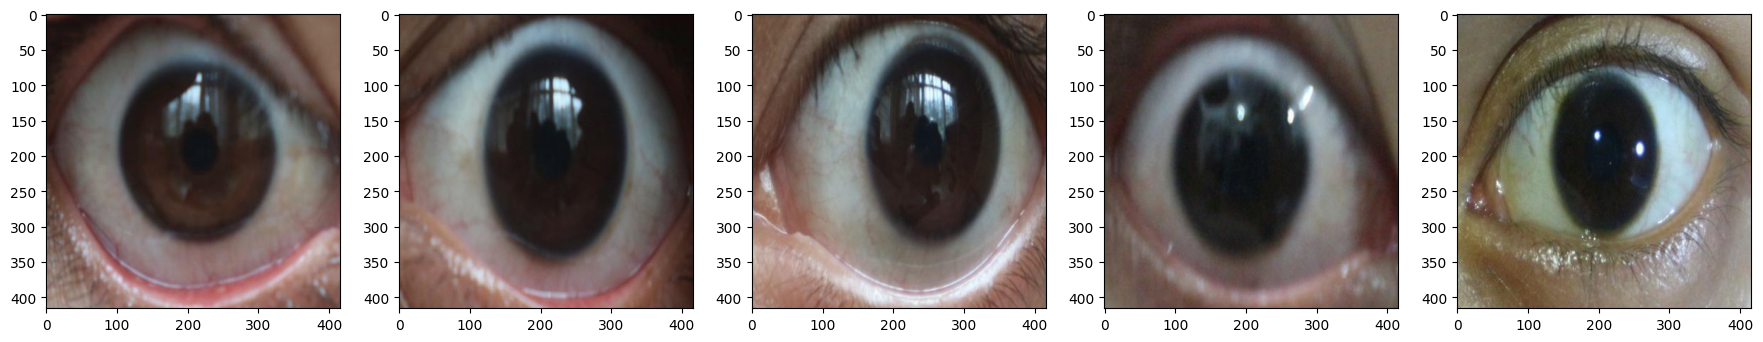

In [7]:
# Preview Normal
os.chdir(train_normal)
filenames = os.listdir()
images = []

for i in range(5):
  image = plt.imread(filenames[i])
  images.append(image)

plt.figure(figsize=(22, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(images[i])
plt.show()

### **3. Pre~Processing With Image Augmentation**

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True,
)

Found 5307 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


In [10]:
print('Class Train :', train_generator.class_indices)
print('Class Test :', test_generator.class_indices)

Class Train : {'cataract': 0, 'normal': 1}
Class Test : {'cataract': 0, 'normal': 1}


### **4. Model Convolutional Neural Network**

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [12]:
# Convolution
img_input = layers.Input(shape = (150, 150, 3))

x = layers.Conv2D(16, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)

In [13]:
# Fully Connected
x = layers.Flatten()(x)
x = layers.Dense(512, activation = 'relu')(x)
output = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(img_input, output)

In [14]:
# Compile
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['Accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10, # 5307 images = batch_size * steps
    epochs = 20,
    validation_data = test_generator,
    validation_steps = 10, # 457 images = batch_size * steps
    verbose = 2
)

Epoch 1/20
10/10 - 260s - loss: 17.7463 - Accuracy: 0.6875 - val_loss: 2.7710 - val_Accuracy: 0.4656 - 260s/epoch - 26s/step
Epoch 2/20
10/10 - 154s - loss: 1.8827 - Accuracy: 0.7302 - val_loss: 3.7445 - val_Accuracy: 0.7156 - 154s/epoch - 15s/step
Epoch 3/20
10/10 - 85s - loss: 0.6304 - Accuracy: 0.8188 - val_loss: 1.5799 - val_Accuracy: 0.7406 - 85s/epoch - 9s/step
Epoch 4/20
10/10 - 87s - loss: 0.5733 - Accuracy: 0.7969 - val_loss: 0.6031 - val_Accuracy: 0.6844 - 87s/epoch - 9s/step
Epoch 5/20
10/10 - 89s - loss: 0.6355 - Accuracy: 0.7656 - val_loss: 0.6336 - val_Accuracy: 0.6687 - 89s/epoch - 9s/step
Epoch 6/20
10/10 - 78s - loss: 0.4339 - Accuracy: 0.7656 - val_loss: 0.5388 - val_Accuracy: 0.6938 - 78s/epoch - 8s/step
Epoch 7/20
10/10 - 75s - loss: 0.4315 - Accuracy: 0.7812 - val_loss: 0.4714 - val_Accuracy: 0.7188 - 75s/epoch - 8s/step
Epoch 8/20
10/10 - 78s - loss: 0.3480 - Accuracy: 0.8500 - val_loss: 0.4720 - val_Accuracy: 0.7625 - 78s/epoch - 8s/step
Epoch 9/20
10/10 - 68s - 

### **5. Testing**

Saving 1_JPG.rf.2c0f555aee5eba1c33fa9015c9f8d6fd.jpg to 1_JPG.rf.2c0f555aee5eba1c33fa9015c9f8d6fd (1).jpg
1/1 [==============================] - 0s 123ms/step
1_JPG.rf.2c0f555aee5eba1c33fa9015c9f8d6fd (1).jpg
Normal


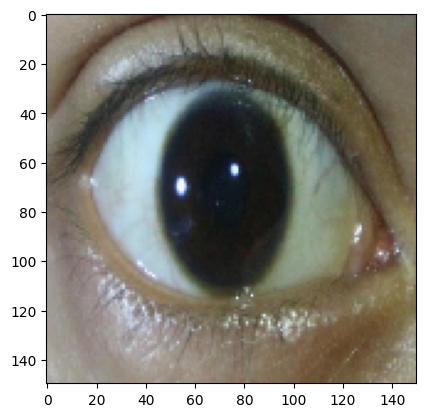

In [17]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('Cataract')
  else:
   print('Normal')
